<a href="https://colab.research.google.com/github/MassloveDen/Hello-World/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2
Предсказание курса доллара

* Хитро готовим данные
* Пробуем разные модели
* Оценим качество моделей
* Выдадим вам ДЗ на конкурс

Данные от центробанка: http://cbr.ru/currency_base/dynamics/

Данные по нефти: https://www.eia.gov/dnav/pet/hist/rbrteD.htm

In [2]:
import pandas as pd

In [239]:
usd_rate = pd.read_excel("/content/usd.xlsx")

In [59]:
usd_2 = pd.read_excel("/content/2019.xlsx")

In [9]:
brent = pd.read_excel("/content/brent.xls", sheet_name=1, skiprows=2, names=["date", "price"])

In [240]:
usd_rate.describe()

,nominal,curs
count,994.0,994.000000
mean,1.0,65.137326
std,0.0,6.215916
min,1.0,55.671700
25%,1.0,59.656600
50%,1.0,64.317700
75%,1.0,68.814400
max,1.0,80.881500


In [62]:
usd_2.describe()

,nominal,curs
count,498.0,498.000000
mean,1.0,69.139372
std,0.0,5.392902
min,1.0,60.947400
25%,1.0,64.147150
50%,1.0,66.845600
75%,1.0,73.971850
max,1.0,80.881500


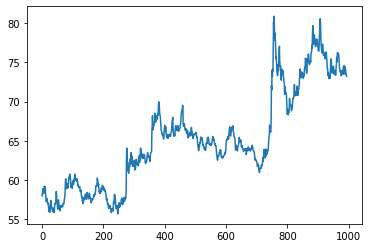

In [241]:
usd_rate["curs"].plot()

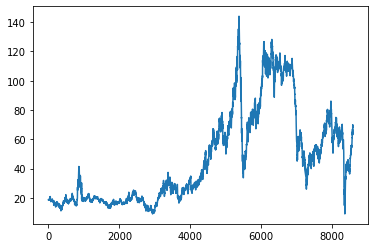

In [242]:
brent["price"].plot()

In [243]:
usd_rate.head(3)

,nominal,data,curs,cdx
0,1,2017-03-01,57.9627,Доллар США
1,1,2017-03-02,58.3776,Доллар США
2,1,2017-03-03,58.4067,Доллар США


In [118]:
usd_2.head(3)

,nominal,data,curs,cdx
0,1,2019-03-01,65.8895,Доллар США
1,1,2019-03-02,65.8145,Доллар США
2,1,2019-03-05,65.7956,Доллар США


In [119]:
brent.head(3)

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [244]:
df = usd_rate.set_index("data").join(brent.set_index("date"))

In [64]:
df1 = usd_2.set_index("data").join(brent.set_index("date"))

In [69]:
df1.head(5)

,curs,price
data,,
2019-03-01,65.8895,63.71
2019-03-02,65.8145,63.71
2019-03-05,65.7956,64.24
2019-03-06,65.8004,64.51
2019-03-07,65.8430,64.82


In [66]:
df1.drop(["nominal", "cdx"], axis=1, inplace=True) 

In [68]:
df1.fillna(method="ffill", inplace=True)

In [245]:
df.reset_index(inplace=True)

In [70]:
df1.reset_index(inplace=True)

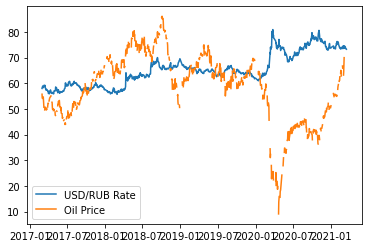

In [246]:
import matplotlib.pyplot as plt
plt.plot(df["data"], df["curs"], label="USD/RUB Rate")
plt.plot(df["data"], df["price"], label="Oil Price")
plt.legend()

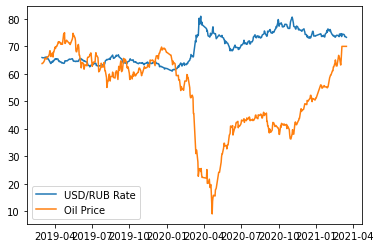

In [71]:
plt.plot(df1["data"], df1["curs"], label="USD/RUB Rate")
plt.plot(df1["data"], df1["price"], label="Oil Price")
plt.legend()

In [72]:
df1

,data,curs,price
0,2019-03-01,65.8895,63.71
1,2019-03-02,65.8145,63.71
2,2019-03-05,65.7956,64.24
3,2019-03-06,65.8004,64.51
4,2019-03-07,65.8430,64.82
...,...,...,...
493,2021-03-10,74.2640,69.95
494,2021-03-11,74.0393,69.95
495,2021-03-12,73.4996,69.95
496,2021-03-13,73.5081,69.95


In [247]:
df["weekday"] = df["data"].dt.weekday
df["month"] = df["data"].dt.month
df["year"] = df["data"].dt.year

In [73]:
df1["weekday"] = df1["data"].dt.weekday
df1["month"] = df1["data"].dt.month
df1["year"] = df1["data"].dt.year

In [248]:
df["data"].dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
989    2021
990    2021
991    2021
992    2021
993    2021
Name: data, Length: 994, dtype: int64

In [75]:
df1["data"].dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
493    2021
494    2021
495    2021
496    2021
497    2021
Name: data, Length: 498, dtype: int64

In [76]:
df1.head(5)

,data,curs,price,weekday,month,year
0,2019-03-01,65.8895,63.71,4,3,2019
1,2019-03-02,65.8145,63.71,5,3,2019
2,2019-03-05,65.7956,64.24,1,3,2019
3,2019-03-06,65.8004,64.51,2,3,2019
4,2019-03-07,65.8430,64.82,3,3,2019


In [249]:
df[ df["weekday"] == 1 ].describe()

,nominal,curs,price,weekday,month,year
count,190.0,190.000000,187.000000,190.0,190.000000,190.000000
mean,1.0,65.176205,58.428503,1.0,6.726316,2018.668421
std,0.0,6.272360,13.312238,0.0,3.391374,1.173135
min,1.0,55.920800,9.120000,1.0,1.000000,2017.000000
25%,1.0,59.692650,50.020000,1.0,4.000000,2018.000000
50%,1.0,64.436650,60.900000,1.0,7.000000,2019.000000
75%,1.0,68.383550,67.320000,1.0,10.000000,2020.000000
max,1.0,80.881500,85.630000,1.0,12.000000,2021.000000


In [77]:
df1[ df1["weekday"] == 1 ].describe() 

,curs,price,weekday,month,year
count,97.000000,97.000000,97.0,97.000000,97.000000
mean,69.099598,53.731753,1.0,6.804124,2019.639175
std,5.469784,13.953119,0.0,3.396196,0.632218
min,60.947400,9.120000,1.0,1.000000,2019.000000
25%,64.246900,42.970000,1.0,4.000000,2019.000000
50%,66.608200,58.140000,1.0,7.000000,2020.000000
75%,74.158600,64.240000,1.0,10.000000,2020.000000
max,80.881500,74.390000,1.0,12.000000,2021.000000


In [79]:
df1[ df1["weekday"] == 2 ].describe() 

,curs,price,weekday,month,year
count,101.000000,101.000000,101.0,101.000000,101.000000
mean,69.059438,53.524059,2.0,6.653465,2019.653465
std,5.422948,13.926546,0.0,3.413021,0.623468
min,61.414000,13.770000,2.0,1.000000,2019.000000
25%,64.140100,42.700000,2.0,4.000000,2019.000000
50%,66.784000,57.920000,2.0,7.000000,2020.000000
75%,73.889600,64.070000,2.0,10.000000,2020.000000
max,80.000600,73.590000,2.0,12.000000,2021.000000


In [78]:
df1[ df1["weekday"] == 3 ].describe() 

,curs,price,weekday,month,year
count,99.000000,99.000000,99.0,99.000000,99.000000
mean,69.163290,52.990606,3.0,6.646465,2019.676768
std,5.294333,14.302375,0.0,3.414594,0.636128
min,61.432800,15.060000,3.0,1.000000,2019.000000
25%,64.197850,42.535000,3.0,4.000000,2019.000000
50%,68.341300,57.370000,3.0,7.000000,2020.000000
75%,73.809750,64.440000,3.0,10.000000,2020.000000
max,78.784700,74.940000,3.0,12.000000,2021.000000


In [80]:
df1[ df1["weekday"] == 4 ].describe() 

,curs,price,weekday,month,year
count,102.000000,102.000000,102.0,102.000000,102.000000
mean,69.217730,52.968137,4.0,6.519608,2019.686275
std,5.475638,14.089128,0.0,3.460471,0.644557
min,61.234000,15.870000,4.0,1.000000,2019.000000
25%,64.127900,42.477500,4.0,3.000000,2019.000000
50%,67.881100,58.185000,4.0,7.000000,2020.000000
75%,73.916275,64.197500,4.0,9.750000,2020.000000
max,80.157000,73.940000,4.0,12.000000,2021.000000


In [81]:
df1[ df1["weekday"] == 5 ].describe() 

,curs,price,weekday,month,year
count,98.000000,98.000000,98.0,98.000000,98.000000
mean,69.105976,53.355510,5.0,6.663265,2019.673469
std,5.412085,13.800157,0.0,3.446031,0.638547
min,61.263200,15.870000,5.0,1.000000,2019.000000
25%,64.044125,42.972500,5.0,3.250000,2019.000000
50%,67.254200,58.620000,5.0,7.000000,2020.000000
75%,73.964800,64.197500,5.0,10.000000,2020.000000
max,79.332300,73.940000,5.0,12.000000,2021.000000


In [83]:
df1.head(5)

,data,curs,price,weekday,month,year
0,2019-03-01,65.8895,63.71,4,3,2019
1,2019-03-02,65.8145,63.71,5,3,2019
2,2019-03-05,65.7956,64.24,1,3,2019
3,2019-03-06,65.8004,64.51,2,3,2019
4,2019-03-07,65.8430,64.82,3,3,2019


In [250]:
df

,data,nominal,curs,cdx,price,weekday,month,year
0,2017-03-01,1,57.9627,Доллар США,55.72,2,3,2017
1,2017-03-02,1,58.3776,Доллар США,54.16,3,3,2017
2,2017-03-03,1,58.4067,Доллар США,54.12,4,3,2017
3,2017-03-04,1,58.9099,Доллар США,NaN,5,3,2017
4,2017-03-07,1,58.3370,Доллар США,54.61,1,3,2017
...,...,...,...,...,...,...,...,...
989,2021-03-10,1,74.2640,Доллар США,NaN,2,3,2021
990,2021-03-11,1,74.0393,Доллар США,NaN,3,3,2021
991,2021-03-12,1,73.4996,Доллар США,NaN,4,3,2021
992,2021-03-13,1,73.5081,Доллар США,NaN,5,3,2021


In [251]:
past_days = 7

for day in range(past_days):
  d = day+1
  df[f"curs_back_{d}d"] = df["curs"].shift(d)
  df[f"oil_back_{d}d"] = df["price"].shift(d)

In [252]:
df

,data,nominal,curs,cdx,price,weekday,month,year,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d
0,2017-03-01,1,57.9627,Доллар США,55.72,2,3,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-02,1,58.3776,Доллар США,54.16,3,3,2017,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-03,1,58.4067,Доллар США,54.12,4,3,2017,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-04,1,58.9099,Доллар США,NaN,5,3,2017,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-07,1,58.3370,Доллар США,54.61,1,3,2017,58.9099,NaN,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2021-03-10,1,74.2640,Доллар США,NaN,2,3,2021,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN,73.4747,65.86
990,2021-03-11,1,74.0393,Доллар США,NaN,3,3,2021,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN
991,2021-03-12,1,73.4996,Доллар США,NaN,4,3,2021,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17
992,2021-03-13,1,73.5081,Доллар США,NaN,5,3,2021,73.4996,NaN,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70


In [253]:
df["usd_8d"] = df["curs"].shift(1).rolling(window=8).median()
df["oil_42d"] = df["price"].shift(1).rolling(window=42).mean()

In [254]:
df

,data,nominal,curs,cdx,price,weekday,month,year,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d,usd_8d,oil_42d
0,2017-03-01,1,57.9627,Доллар США,55.72,2,3,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-02,1,58.3776,Доллар США,54.16,3,3,2017,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-03,1,58.4067,Доллар США,54.12,4,3,2017,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-04,1,58.9099,Доллар США,NaN,5,3,2017,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-07,1,58.3370,Доллар США,54.61,1,3,2017,58.9099,NaN,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2021-03-10,1,74.2640,Доллар США,NaN,2,3,2021,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN,73.4747,65.86,73.91560,NaN
990,2021-03-11,1,74.0393,Доллар США,NaN,3,3,2021,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN,74.15440,NaN
991,2021-03-12,1,73.4996,Доллар США,NaN,4,3,2021,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.15440,NaN
992,2021-03-13,1,73.5081,Доллар США,NaN,5,3,2021,73.4996,NaN,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.04205,NaN


In [255]:
df = pd.get_dummies(df, columns=["year", "month", "weekday"])
df.drop(["data", "price"], axis=1, inplace=True)

In [224]:
df.drop(["cdx"], axis=1, inplace=True)

KeyError: ignored

In [256]:
df

,nominal,curs,cdx,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d,usd_8d,oil_42d,year_2017,year_2018,year_2019,year_2020,year_2021,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,57.9627,Доллар США,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,58.3776,Доллар США,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,58.4067,Доллар США,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,58.9099,Доллар США,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,58.3370,Доллар США,58.9099,NaN,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,74.2640,Доллар США,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN,73.4747,65.86,73.91560,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
990,1,74.0393,Доллар США,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.4373,NaN,74.15440,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
991,1,73.4996,Доллар США,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.0448,63.17,74.15440,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
992,1,73.5081,Доллар США,73.4996,NaN,74.0393,NaN,74.2640,NaN,74.4275,NaN,73.7864,69.95,73.5187,67.32,74.5755,64.70,74.04205,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [257]:
X = df.drop("curs", axis=1) # Входные данные
y = df["curs"] # Выход

Тестовая выборка - экзамен

Тренировочная выборка - учебник



In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train - задачи в учебнике


y_train - ответы на задачи в учебника

X_test - задачи на экзамене

y_test - ответы на экзамен



In [259]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(665, 41)
(665,)
(329, 41)
(329,)


In [260]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: ignored

In [261]:
prediction = model.predict(X_test)

NotFittedError: ignored

In [237]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

In [238]:
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42, criterion="mae")
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.4113472966237989
MAX 2.583302999999944


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.4198826366559487
MAX 2.4607500000000044


In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,100,100))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, prediction))
print("MAX", max_error(y_test, prediction))

MAE 0.7027541936350192
MAX 3.3498292723852643


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ДЕНЬ 3
(специально для Андрея)

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearch - поиск по сетке параметров

n_estimators = 100, 200, 500, 1000

max_depth = 3,5,10,15

criterion = mse, mae


CV - cross validation, кросс-валидация

```
X - тренировочные примеры
* - тестовые примеры

[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]

Перемешивать
[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]

КВ
[XXXXXXXXXXXXXXXXXXXXXXXXXX*********]
[XXXXXXXXXXXXXXXXX*********XXXXXXXXX]
[XXXXXXXX*********XXXXXXXXXXXXXXXXXX]
[*********XXXXXXXXXXXXXXXXXXXXXXXXXX]
```


In [ ]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50,100,500],
    "criterion": ["mse", "mae"],
    "min_samples_split": [2,3],
}
GS = GridSearchCV(model, param_grid, scoring = "neg_mean_absolute_error", cv=3, n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
GS.best_score_

-0.38124203310765353

In [ ]:
GS.best_params_

{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
df.to_excel("df.xls")